# **Análisis descriptivo**

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [35]:
df = pd.read_csv('df_final.csv', parse_dates=['birth_date', 'diagnosis_date', 'death_date'])
df = df.drop('Unnamed: 0',axis=1)
df

,ehr,birth_date,diagnosis_date,death_date,Age,er,her2,ki67,pr,pregnancy,...,m_category,t_category_after_neoadj,n_category_after_neoadj,m_category_after_neoadj,stage_diagnosis,stage_after_neo,grade,ductal,lobular,neoadjuvant
0,10011773,1959-07-05,2015-04-02,NaT,65,0.0,0.0,19.0,1.0,0.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,0,SIN TRATAMIENTO,1.0,0.0,0.0,0.0
1,10020495,1953-10-02,2017-12-04,NaT,71,1.0,0.0,9.0,0.0,0.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,2.0,1.0,0.0,0.0
2,10030299,1966-08-16,2019-06-27,NaT,58,1.0,0.0,18.0,1.0,3.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,1.0,1.0,0.0,0.0
3,10030824,1953-03-03,2018-09-07,NaT,71,1.0,0.0,18.0,1.0,0.0,...,0.0,2,2.0,0.0,IIIA,IIIA,3.0,0.0,1.0,1.0
4,10041592,1959-07-06,2018-11-19,NaT,65,0.0,0.0,65.0,0.0,0.0,...,0.0,4,0.0,0.0,IB,IA,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11162,99343880,1944-08-23,2018-05-28,NaT,80,1.0,0.0,68.0,1.0,2.0,...,1.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,2.0,0.0,0.0,0.0
11163,99443402,1959-06-17,2018-01-21,NaT,65,1.0,0.0,22.0,0.0,0.0,...,1.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IIB,SIN TRATAMIENTO,3.0,0.0,1.0,0.0
11164,99656792,1976-03-26,2017-07-23,NaT,48,1.0,1.0,49.0,0.0,0.0,...,0.0,4,0.0,0,IA,SIN TRATAMIENTO,1.0,0.0,0.0,1.0
11165,99690760,1961-07-21,2013-10-28,NaT,63,1.0,0.0,20.0,1.0,1.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,1.0,1.0,0.0,0.0


Utilizamos el parámetro 'parse_dates' para que se mantenga el tipo de datetime para las columnas ['birth_date', 'diagnosis_date', 'death_date']

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ehr                      11167 non-null  int64         
 1   birth_date               11167 non-null  datetime64[ns]
 2   diagnosis_date           11167 non-null  datetime64[ns]
 3   death_date               1275 non-null   datetime64[ns]
 4   Age                      11167 non-null  int64         
 5   er                       11167 non-null  float64       
 6   her2                     11167 non-null  float64       
 7   ki67                     11167 non-null  float64       
 8   pr                       11167 non-null  float64       
 9   pregnancy                11167 non-null  float64       
 10  birth                    11167 non-null  float64       
 11  caesarean                11167 non-null  float64       
 12  abort                    11167 n

Realizaremos ahora un análisis descriptivo de los datos

Antes de nada, vamos a mostrar la matriz de correlaciones entre las variables, para ver cuales de ellas están correlacionadas y cuales no

In [37]:
correlaciones = df.corr(method='pearson')
correlaciones.style.background_gradient(cmap='coolwarm',axis=None).set_precision(3)

/var/folders/vq/_5shyx4s4fqbgck29gkr7mc80000gn/T/ipykernel_68640/732683472.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlaciones.style.background_gradient(cmap='coolwarm',axis=None).set_precision(3)


,ehr,Age,er,her2,ki67,pr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age,n_tumor,n_category,m_category,grade,ductal,lobular,neoadjuvant
ehr,1.000,-0.025,-0.001,0.019,-0.020,-0.007,0.002,-0.004,0.005,0.005,0.017,0.022,0.004,-0.005,-0.012,0.022,-0.006,-0.005,-0.007
Age,-0.025,1.000,0.008,0.005,-0.011,-0.014,0.009,0.010,0.005,-0.006,0.013,0.054,0.000,-0.016,0.002,-0.014,-0.017,0.014,-0.017
er,-0.001,0.008,1.000,-0.049,-0.156,0.116,-0.020,-0.017,0.008,-0.014,-0.020,-0.005,0.008,0.004,0.006,-0.039,-0.006,0.009,-0.051
her2,0.019,0.005,-0.049,1.000,0.178,-0.074,0.005,-0.012,0.023,0.002,-0.003,0.011,-0.001,0.008,-0.010,0.048,0.004,0.005,0.128
ki67,-0.020,-0.011,-0.156,0.178,1.000,-0.153,0.014,0.002,-0.004,0.023,0.010,0.000,0.006,-0.007,0.001,0.033,-0.015,0.005,0.075
pr,-0.007,-0.014,0.116,-0.074,-0.153,1.000,0.006,0.008,0.017,-0.019,0.003,-0.002,-0.008,0.013,-0.019,-0.050,0.013,-0.001,-0.048
pregnancy,0.002,0.009,-0.020,0.005,0.014,0.006,1.000,0.693,0.264,0.316,-0.004,-0.004,-0.011,0.011,0.001,-0.003,0.011,0.022,0.014
birth,-0.004,0.010,-0.017,-0.012,0.002,0.008,0.693,1.000,-0.223,-0.136,-0.001,-0.008,-0.006,0.007,0.003,-0.011,0.011,0.008,0.000
caesarean,0.005,0.005,0.008,0.023,-0.004,0.017,0.264,-0.223,1.000,-0.273,-0.014,0.005,-0.006,0.010,-0.008,0.001,0.003,0.012,0.010
abort,0.005,-0.006,-0.014,0.002,0.023,-0.019,0.316,-0.136,-0.273,1.000,0.009,-0.000,-0.002,-0.002,0.006,0.010,-0.002,0.012,0.013


Observamos que las correlaciones no nos aportan información, ya que son muy bajas para todos los valores no esperados. Para las variables en las que sí esperábamos correlación alta, como 'birth' y 'pregnancy', o 'ductal' y 'lobular' sí que se da dicha correlación, pero no nos aporta información nueva.

Calcularemos ahora las estadísticas descriptivas de nuestro conjunto de datos

In [38]:
df.describe()

,ehr,Age,er,her2,ki67,pr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age,n_tumor,n_category,m_category,grade,ductal,lobular,neoadjuvant
count,1.116700e+04,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000
mean,5.499182e+07,63.225038,0.697054,0.142652,22.751231,0.697412,0.988179,0.693472,0.118832,0.175875,13.113198,48.911256,1.107101,0.887347,0.125907,1.939733,0.566311,0.140056,0.508373
std,2.609116e+07,10.005432,0.459553,0.349734,17.939229,0.459399,1.779851,1.635891,1.134250,1.094847,1.215720,2.487386,0.309256,0.996694,0.331759,0.695836,0.495605,0.347060,0.499952
min,1.001177e+07,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.000000,-12.000000,-15.000000,10.000000,37.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.216752e+07,56.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,49.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,5.491445e+07,63.000000,1.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.110481,49.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000
75%,7.776129e+07,70.000000,1.000000,0.000000,26.000000,1.000000,2.000000,1.000000,0.000000,0.000000,13.110481,49.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000
max,9.999442e+07,99.000000,1.000000,1.000000,100.000000,1.000000,14.000000,14.000000,13.000000,12.000000,20.000000,62.000000,2.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000


Atendiendo a estos estadísticos, la edad promedio de mi conjunto de datos es de aproximadamente mujeres de 63 años con una desviación de 10 años. Con una edad mínima de 26 años y una máxima de 99.

En cuanto a los receptores, alrededor del 69.7% posee receptores de estrógenos (er) y el 14% tienen el her2 sobreexpresado. El ki67 (el índice de proliferación del tumor) tiene una media de alrededor 22.75%. En promedio, alrededor del 69.7% de mujeres tiene receptores de progestores.

La mayoría de las pacientes presentan tumores de grado 1 o 2, ya que el valor medio es 1.94.
Además, alrededor de la mitad de las pacientes (50.8%) recibieron el tratamiento neoadyuvante

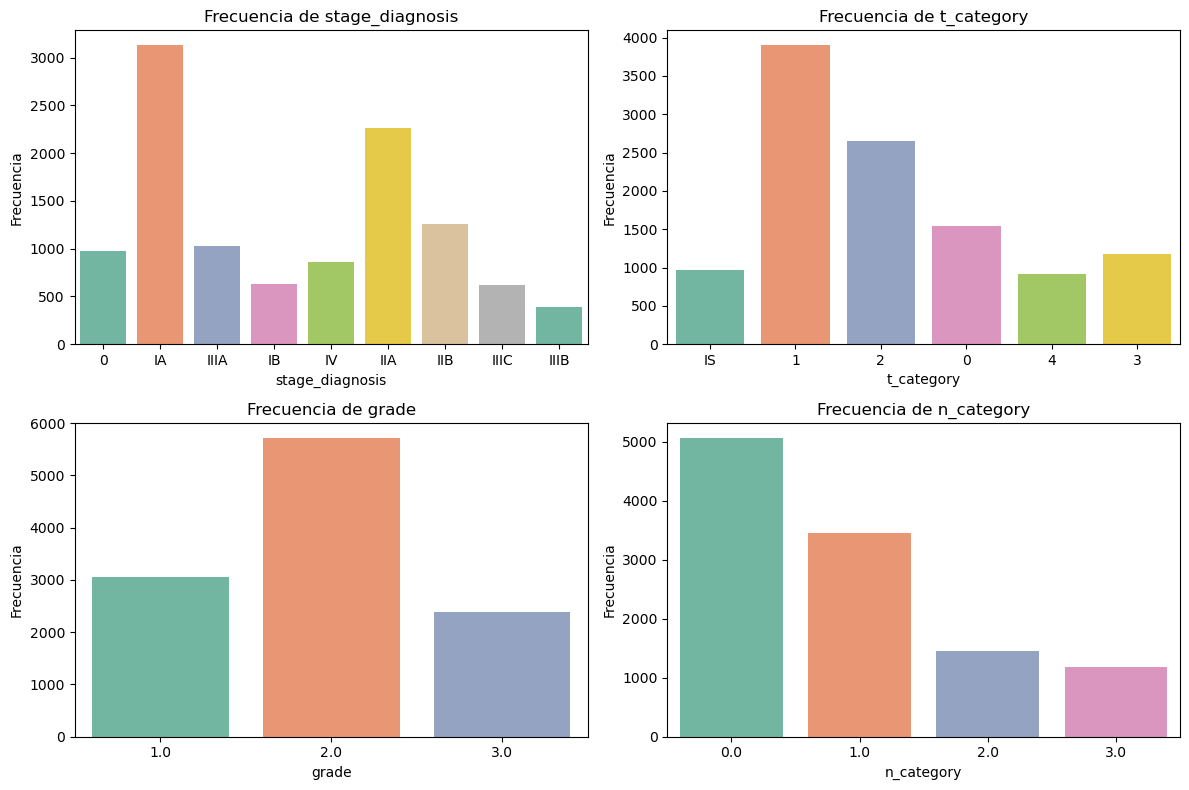

In [49]:
categorical_variables = ['stage_diagnosis', 't_category', 'grade', 'n_category']

plt.figure(figsize=(12, 8))

for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=variable, data=df, palette='Set2') 
    plt.title(f'Frecuencia de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Como podemos observar en los gráficos de frecuencias, para la variable stage_diagnosis (estadio del tumor) los valores más propensos son IA y IIA. Esto quiere decir que; el estadio IA significa que el tumor es pequeño y se ha limitado a la mama sin extensión a los ganglios linfáticos, y el estadio IIA, que puede ser que el tamaño del ganglio es más grande con la afectación de poco ganglios linfáticos o que el tamaño del tumor varía pero se ven afectamos más ganglios linfáticos.

Como el valor de stage_diagnosis es el IA (sin extensión a los ganglios linfáticos), por eso el valor moda de la variable n_category (ganglios afectados por el tumor) es entre 0 y 1. Siguiendo esta línea, también podemos observar que la variable t_category (tamaño del tumor) tiene como valor predominante el 1.


Un dato a destacar, es que el promedio de embarazos es aproximadamente 0.99, de partos naturales es de 0.69 y por cesárea 0.12. Llevando a pensar que es más probable sufrir cáncer de mama, si se ha tenido un parto natural

Analizaremos ahora si la edad del paciente varía significativamente en el momento del diagnóstico de cáncer de mama. Para ello utilizaremos la prueba t Student para comparar las medias de ambos grupos. 

Para ello, calculamos la columna age_at_diagnosis a nuestro df

In [39]:
df['age_at_diagnosis'] = (df['diagnosis_date'] - df['birth_date']).dt.days // 365.25

print(df[['birth_date', 'diagnosis_date', 'age_at_diagnosis']])

      birth_date diagnosis_date  age_at_diagnosis
0     1959-07-05     2015-04-02              55.0
1     1953-10-02     2017-12-04              64.0
2     1966-08-16     2019-06-27              52.0
3     1953-03-03     2018-09-07              65.0
4     1959-07-06     2018-11-19              59.0
...          ...            ...               ...
11162 1944-08-23     2018-05-28              73.0
11163 1959-06-17     2018-01-21              58.0
11164 1976-03-26     2017-07-23              41.0
11165 1961-07-21     2013-10-28              52.0
11166 1948-08-06     2017-07-08              68.0

[11167 rows x 3 columns]


In [40]:
# Filtrar los datos para obtener dos grupos: pacientes que han fallecido y pacientes que no han fallecido.
pacientes_vivos = df[df['death_date'].isnull()]
pacientes_fallecidos = df[df['death_date'].notnull()]

t_stat, p_value = ttest_ind(pacientes_vivos['age_at_diagnosis'], pacientes_fallecidos['age_at_diagnosis'], equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


T-Statistic: 0.8861919751482327
P-Value: 0.3756461054217527


Como el p-valor esta por encima del nivel de significancia 0.5. Este valor sugiere que no hay evidencia suficiente para rechazar la hipótesis nula (No hay diferencia significativa en las edades al momento del diagnóstico).

Por lo tanto, exploraremos más a fondo la distribución de edades de ambos grupos.

Para ello, primero visualizaremos dos histogramas superpuestos para comparar visualmente las distribuciones

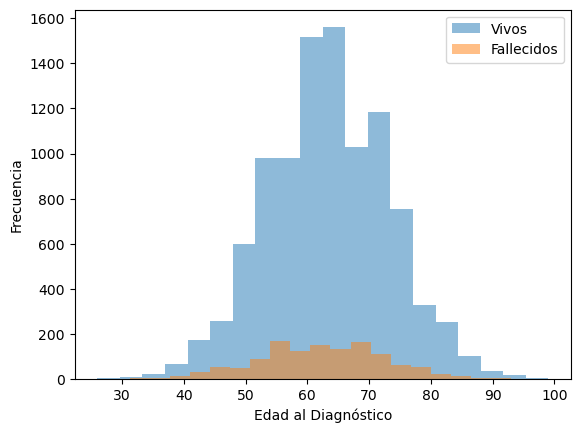

In [41]:
plt.hist(pacientes_vivos['Age'], bins=20, alpha=0.5, label='Vivos')
plt.hist(pacientes_fallecidos['Age'], bins=20, alpha=0.5, label='Fallecidos')
plt.xlabel('Edad al Diagnóstico')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Podemos observar, que el cáncer de mama se suele detectar en torno a los 55-75 años, aunque si bien hay casos mas jóvenes y más mayores

Vamos a realizar un pequeño análisis para observar cual es el porcentaje de fallecidas respecto a la edad a la que fueron diagnosticadas

In [42]:
porcentaje = (
    pacientes_fallecidos['Age'].value_counts(sort=False) / df['Age'].value_counts(sort=False)
) * 100

resultado = pd.DataFrame({
    'Edad del Diagnóstico': porcentaje.index,
    'Porcentaje de Fallecidos': porcentaje.values
})

resultado = resultado.sort_values(by='Porcentaje de Fallecidos', ascending=False)
resultado.reset_index(drop=True, inplace=True)
resultado

,Edad del Diagnóstico,Porcentaje de Fallecidos
0,28,75.000000
1,32,50.000000
2,39,34.615385
3,91,33.333333
4,35,30.769231
...,...,...
65,94,NaN
66,95,NaN
67,96,NaN
68,98,NaN


Observamos que la edad de diagnóstico con más tasa de mortalidad es cuando se detecta en una edad temprada (28, 32, 39, ...) con respecto a donde normalmente se suele detectar. Podemos concluir entonces, que cuanto más pronto se detecta el cáncer de mama, más posibilidades hay de no superarlo

Analizamos ahora las variables 'death' (si a fallecido o no una paciente) con 'neoadjuvant' (si ha recibido tratamiento o no)

In [51]:
df['death'] = df['death_date'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [56]:
contingency_table = pd.crosstab(df['death'], df['neoadjuvant'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")

Estadístico de chi-cuadrado: 1.106786555903341
Valor p: 0.2927815481727658


No hay suficiente evidencia para concluir que la mortalidad está asociada con el tratamiento neoadyuvante en este conjunto de datos. se puede interpretar como que en la muestra dada, no parece haber una diferencia significativa en la proporción de mortalidad entre los grupos de pacientes con y sin tratamiento neoadyuvante